In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import save_model
from joblib import dump

In [8]:
dat = pd.read_csv('./StudentPerformanceFactors.csv')
dat = dat[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions', 'Exam_Score']]
dat

,Hours_Studied,Attendance,Previous_Scores,Tutoring_Sessions,Exam_Score
0,23,84,73,0,67
1,19,64,59,2,61
2,24,98,91,2,74
3,29,89,98,1,71
4,19,92,65,3,70
...,...,...,...,...,...
6602,25,69,76,1,68
6603,23,76,81,3,69
6604,20,90,65,3,68
6605,10,86,91,2,68


In [9]:
# data preprocessing
X, y = dat[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Tutoring_Sessions']], dat[[ 'Exam_Score']]
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) #make sure not to leak information to test set

For Degree: 1, Train MSE: 6.361797251640073, Test MSE: 5.069439258236874, Train R2: 0.5863849821854334, Test R2: 0.6413573918421556


For Degree: 2, Train MSE: 6.348348076927451, Test MSE: 5.084437280132165, Train R2: 0.5872593861342419, Test R2: 0.6402963416123899
For Degree: 3, Train MSE: 6.318106445722766, Test MSE: 5.091288170780315, Train R2: 0.5892255589521894, Test R2: 0.6398116684236808
For Degree: 4, Train MSE: 6.270753949026224, Test MSE: 5.156117061623396, Train R2: 0.5923042021390114, Test R2: 0.6352252829653353


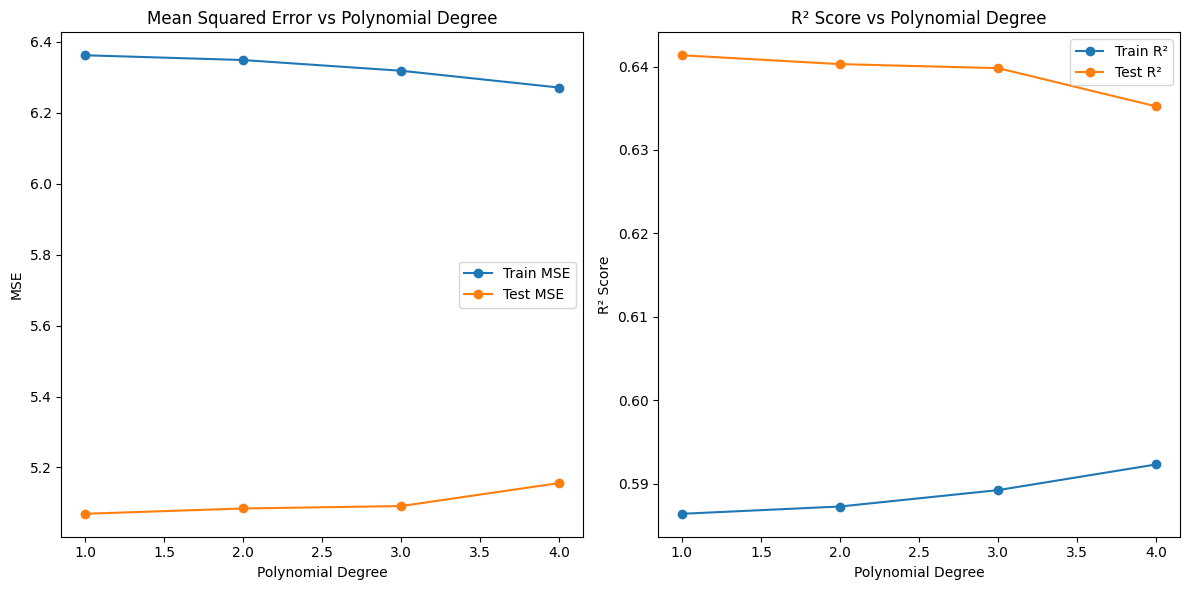

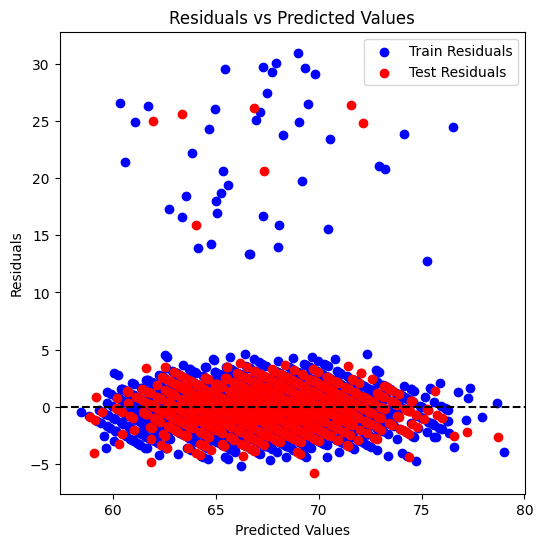

In [65]:
# Polynomial Regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

train_mse_list = []
test_mse_list = []
train_r2_list = []
test_r2_list = []

degrees = [1,2,3,4]
for i in degrees:
    poly = PolynomialFeatures(degree=i)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)
    
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)
    
    train_mse = mean_squared_error(y_train, y_train_pred)
    test_mse = mean_squared_error(y_test, y_test_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)
    train_r2_list.append(train_r2)
    test_r2_list.append(test_r2)
    
    print(f'For Degree: {i}, Train MSE: {train_mse}, Test MSE: {test_mse}, Train R2: {train_r2}, Test R2: {test_r2}')

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(degrees, train_mse_list, marker='o', label='Train MSE')
plt.plot(degrees, test_mse_list, marker='o', label='Test MSE')
plt.title('Mean Squared Error vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('MSE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(degrees, train_r2_list, marker='o', label='Train R²')
plt.plot(degrees, test_r2_list, marker='o', label='Test R²')
plt.title('R² Score vs Polynomial Degree')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
plt.scatter(y_train_pred, train_residuals, color='blue', label='Train Residuals')
plt.scatter(y_test_pred, test_residuals, color='red', label='Test Residuals')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.legend()
plt.show()




    

In [64]:
# Neural Network
import numpy as np
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



def create_model(learning_rate=0.001, regularization=0, momentum=0):
    model = Sequential()
    model.add(Dense(2, activation='relu', input_shape=(X.shape[1],), kernel_regularizer=tf.keras.regularizers.l2(regularization)))
    model.add(Dense(1, activation='relu'))

    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss='mse', metrics=['mse'])
    return model
model = KerasRegressor(build_fn=create_model, epochs=10, verbose=0)
param_grid = {
    'batch_size': [16, 32],
    'learning_rate': [0.001, 0.01],
    'regularization': [0.001, 0.0001],
    'momentum': [0.0, 0.9]
}
grid = GridSearchCV(estimator=model, param_grid=param_grid,n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)
print("Best parameters found: ", grid_result.best_params_)
print("Best score: ", grid_result.best_score_)

#Rebuild model with best hyperparameters
best_params = grid_result.best_params_
best_model = create_model(learning_rate=best_params['learning_rate'],regularization=best_params['regularization'], momentum=best_params['momentum'])
history = best_model.fit(X_train, y_train, epochs=10, batch_size=best_params['batch_size'], validation_data=(X_test, y_test))

C:\Users\hippo\AppData\Local\Temp\ipykernel_40472\2813429155.py:23: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_model, epochs=10, verbose=0)


Best parameters found:  {'batch_size': 16, 'learning_rate': 0.001, 'momentum': 0.0, 'regularization': 0.0001}
Best score:  -6.527410984039307
Epoch 1/10
331/331 [==============================] - 1s 2ms/step - loss: 299.5638 - mse: 299.5638 - val_loss: 5.0983 - val_mse: 5.0983
Epoch 2/10
331/331 [==============================] - 0s 1ms/step - loss: 6.5471 - mse: 6.5470 - val_loss: 5.7824 - val_mse: 5.7824
Epoch 3/10
331/331 [==============================] - 0s 1ms/step - loss: 6.5387 - mse: 6.5387 - val_loss: 5.2232 - val_mse: 5.2232
Epoch 4/10
331/331 [==============================] - 0s 1ms/step - loss: 6.5131 - mse: 6.5130 - val_loss: 5.0987 - val_mse: 5.0987
Epoch 5/10
331/331 [==============================] - 0s 1ms/step - loss: 6.5280 - mse: 6.5279 - val_loss: 5.4877 - val_mse: 5.4877
Epoch 6/10
331/331 [==============================] - 0s 1ms/step - loss: 6.5594 - mse: 6.5593 - val_loss: 5.2140 - val_mse: 5.2140
Epoch 7/10
331/331 [==============================] - 0s 1ms/s

Final Test MSE: 5.253965377807617
Final Test RMSE: 2.2921530005232236
42/42 [==============================] - 0s 844us/step


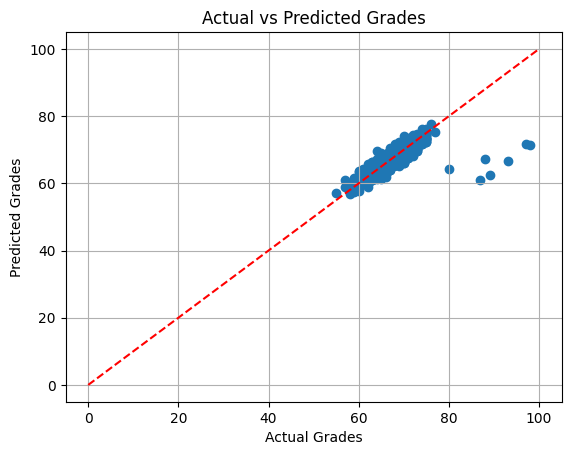

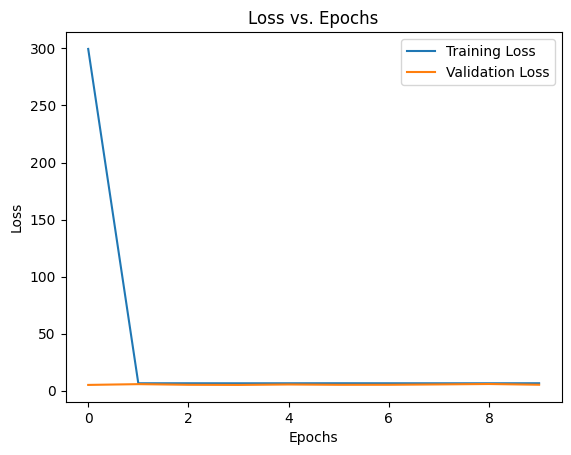

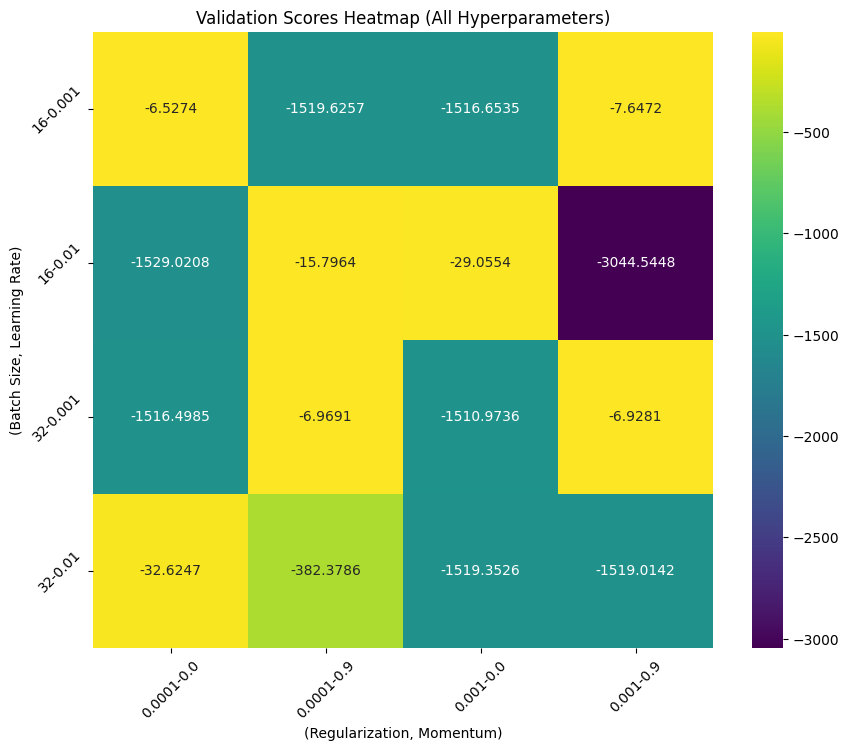

42/42 [==============================] - 0s 818us/step


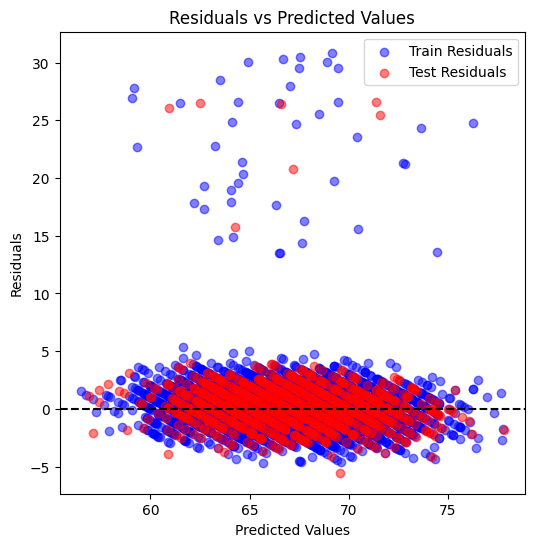

In [67]:
# Evaluate the model on the test set
final_test_mse = best_model.evaluate(X_test, y_test, verbose=0)[0]
final_test_rmse = np.sqrt(final_test_mse)
print(f"Final Test MSE: {final_test_mse}")
print(f"Final Test RMSE: {final_test_rmse}")

# Graph for actual vs predicted
y_pred = best_model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Actual vs Predicted Grades')
plt.plot([0, 100], [0, 100], 'r--')  
plt.grid(True)
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs. Epochs')
plt.legend()
plt.show()

# Convert the GridSearchCV results into a DataFrame
results = pd.DataFrame(grid_result.cv_results_)

# Pivot table: average scores for different combinations
# We'll aggregate by `param_regularization` and `param_momentum`, and use the mean test score.
heatmap_data = results.pivot_table(
    index=['param_batch_size', 'param_learning_rate'], 
    columns=['param_regularization', 'param_momentum'], 
    values='mean_test_score'
)

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".4f", cmap="viridis")
plt.title('Validation Scores Heatmap (All Hyperparameters)')
plt.xlabel('(Regularization, Momentum)')
plt.ylabel('(Batch Size, Learning Rate)')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

# Predict on both training and test data
train_predictions = best_model.predict(X_train)
test_predictions = best_model.predict(X_test)

# Calculate residuals
train_residuals = y_train - train_predictions
test_residuals = y_test - test_predictions

# Plot Residuals vs Predicted Values
plt.figure(figsize=(6, 6))
plt.scatter(train_predictions, train_residuals, color='blue', label='Train Residuals', alpha=0.5)
plt.scatter(test_predictions, test_residuals, color='red', label='Test Residuals', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.legend()
plt.show()

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

#Initialize the model
random_forest = RandomForestRegressor(random_state=42)

#Hyperparameter tuning: Grid search
param_grid = {
    'n_estimators' : [50, 100, 200],  #Trees in the "forest"
    'max_depth' : [None, 10, 20],   #Maximum depth per treee
    'min_samples_split': [10, 20, 40], #Minimum number of samples to split an internal node
    'min_samples_leaf': [6, 8, 10] #Minimum number of samples to be at a "leaf" node
}

grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, n_jobs=1)
grid_search_result = grid_search.fit(X_train, y_train.values.ravel())

#Best hyperparameters
best_random_forest = grid_search_result.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_) #Best R2 score

#Evaluation
y_test_pred = best_random_forest.predict(X_test)
y_train_pred = best_random_forest.predict(X_train)

#Performance metrics
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("\nRandom Forest Performance:")
print(f"Train MSE: {train_mse}, Test MSE: {test_mse}")
print(f"Train R2: {train_r2}, Test R2: {test_r2}")


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 200}
Best Cross-Validation Score: 0.5614919319096657

Random Forest Performance:
Train MSE: 5.280620072502851, Test MSE: 5.344748464734049
Train R2: 0.6566781871589588, Test R2: 0.6218803635480334


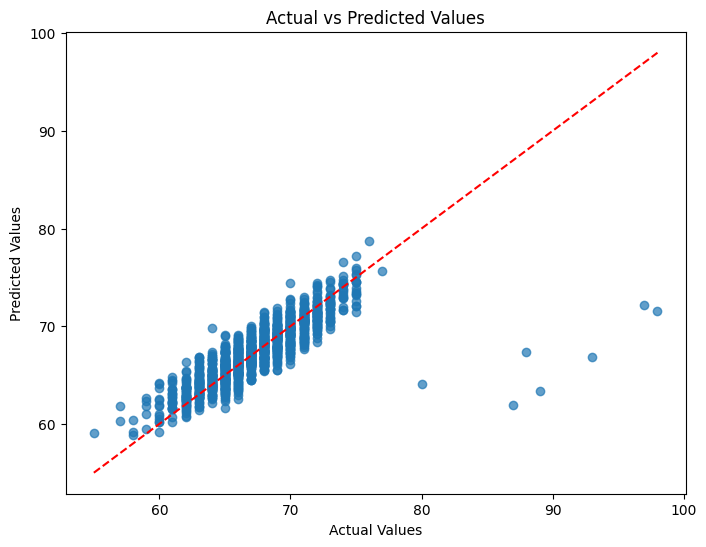

C:\Users\hippo\AppData\Local\Temp\ipykernel_40472\3272944763.py:26: FutureWarning: The provided callable <function mean at 0x00000188AAD39620> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table = results.pivot_table(


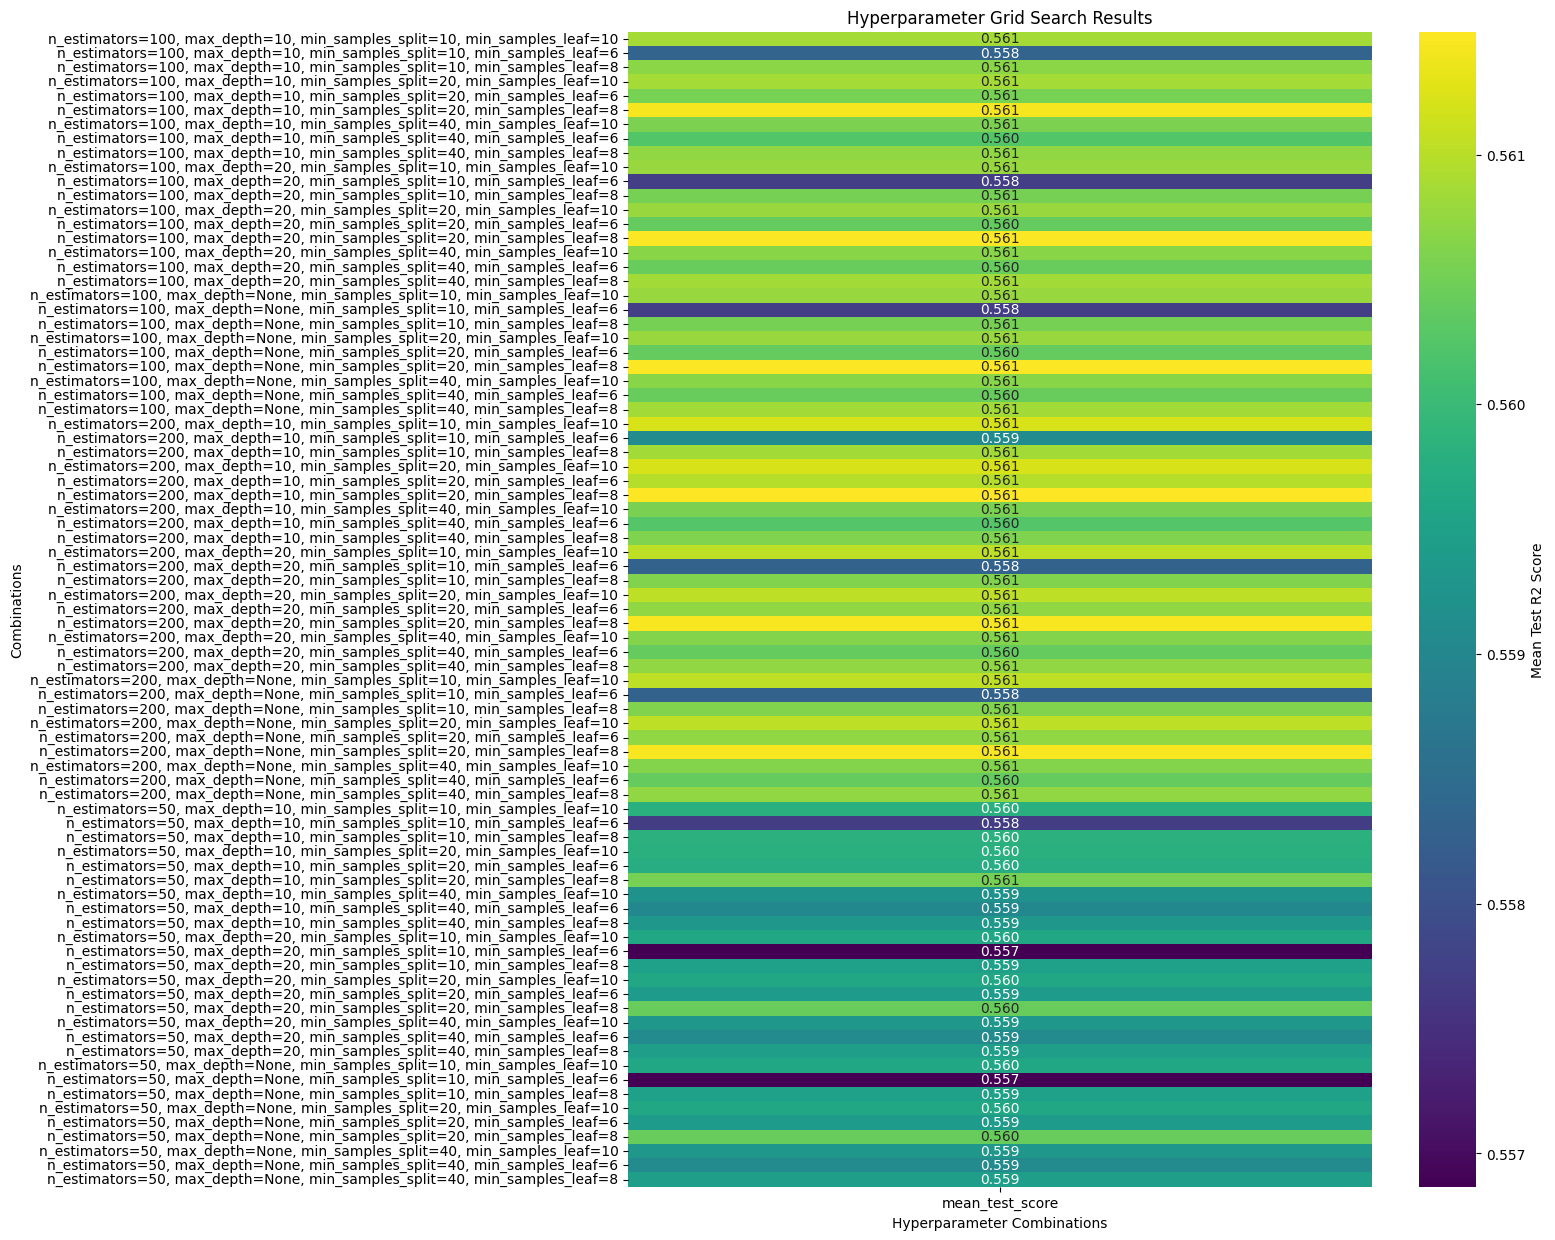

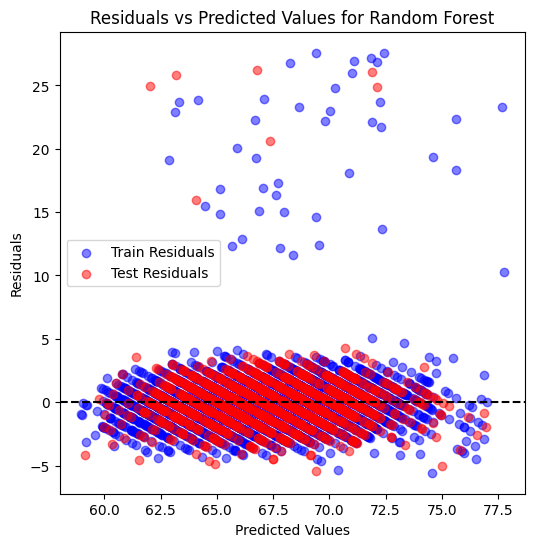

In [69]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') # line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Extracting the grid search results
results = pd.DataFrame(grid_search.cv_results_)

# Creating a column that combines all hyperparameter settings into a single label
results['param_combination'] = results.apply(
    lambda row: f"n_estimators={row['param_n_estimators']}, max_depth={row['param_max_depth']}, min_samples_split={row['param_min_samples_split']}, min_samples_leaf={row['param_min_samples_leaf']}",
    axis=1
)

# Sorting the results for consistent ordering in the heatmap
results = results.sort_values(by='mean_test_score', ascending=False)

# Creating a pivot table to organize scores for heatmap visualization
pivot_table = results.pivot_table(
    values='mean_test_score',  # Cross-validation score to plot
    index='param_combination',  # Y-axis: Hyperparameter combinations
    aggfunc=np.mean  # Averaging over repetitions if any
)

# Plotting the heatmap
plt.figure(figsize=(12, 15))
sns.heatmap(pivot_table, annot=True, fmt=".3f", cmap="viridis", cbar_kws={'label': 'Mean Test R2 Score'})
plt.title("Hyperparameter Grid Search Results")
plt.xlabel("Hyperparameter Combinations")
plt.ylabel("Combinations")
plt.yticks(rotation=0)
plt.show()

import numpy as np
import matplotlib.pyplot as plt

# Flatten y_train and y_test to 1D arrays (if they're not already)
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Predict on both training and test data
train_predictions_rf = best_random_forest.predict(X_train)
test_predictions_rf = best_random_forest.predict(X_test)

# Calculate residuals
train_residuals_rf = y_train_flat - train_predictions_rf
test_residuals_rf = y_test_flat - test_predictions_rf

# Plot Residuals vs Predicted Values
plt.figure(figsize=(6, 6))
plt.scatter(train_predictions_rf, train_residuals_rf, color='blue', label='Train Residuals', alpha=0.5)
plt.scatter(test_predictions_rf, test_residuals_rf, color='red', label='Test Residuals', alpha=0.5)
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values for Random Forest')
plt.legend()
plt.show()


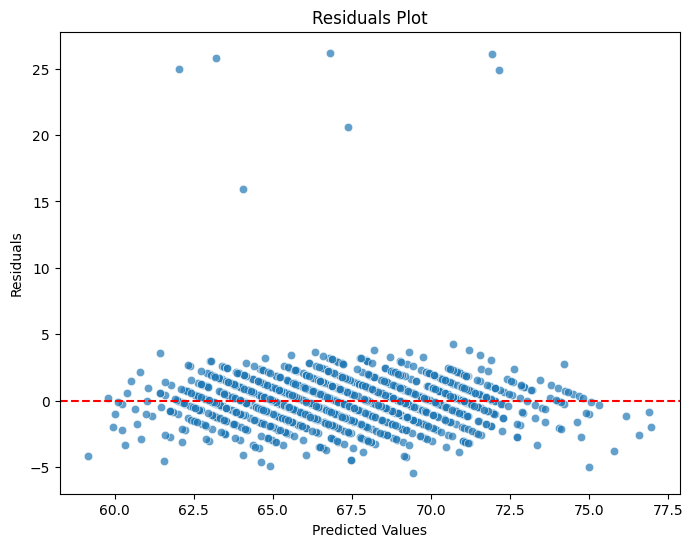

In [47]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

residuals = y_test.values.ravel() - y_test_pred

plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_pred, y=residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()



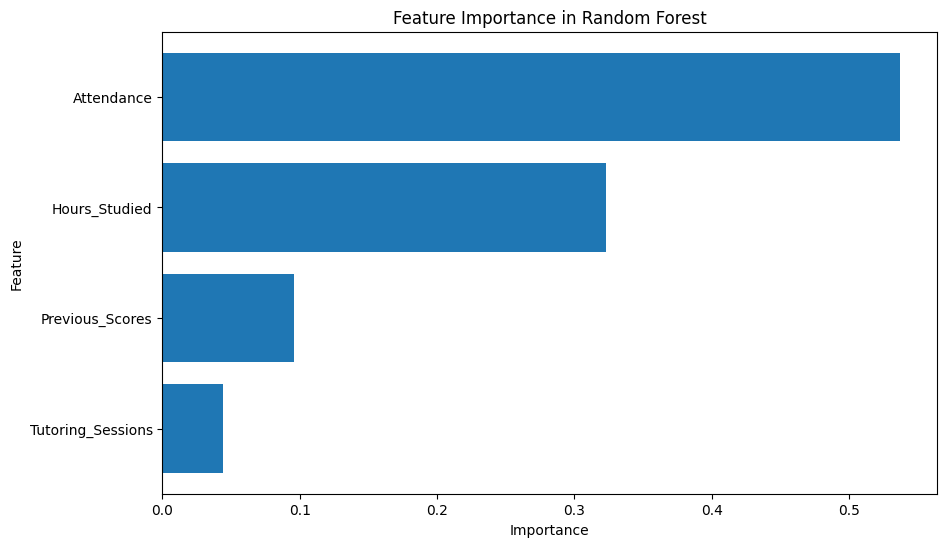

In [ ]:
# Get feature importances
importances = best_random_forest.feature_importances_
features = X.columns

# Sort features by importance
sorted_indices = np.argsort(importances)[::-1]  # descending order
sorted_features = np.array(features)[sorted_indices]
sorted_importances = importances[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Random Forest')
plt.gca().invert_yaxis()  # most important feature is at the top
plt.show()

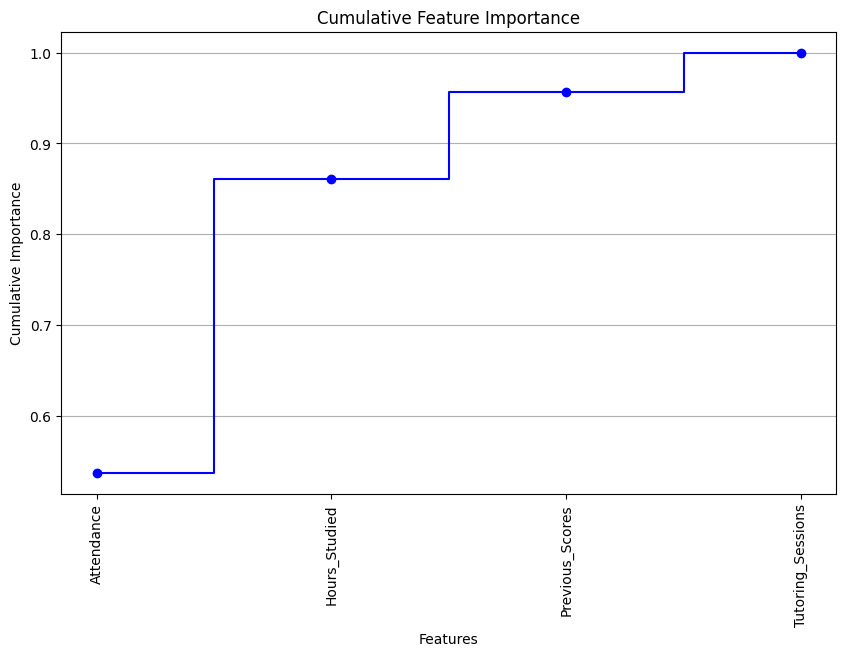

In [32]:
cumulative_importances = np.cumsum(sorted_importances)

plt.figure(figsize=(10, 6))
plt.step(range(len(sorted_features)), cumulative_importances, where='mid', color='b', marker='o')
plt.xticks(range(len(sorted_features)), sorted_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Cumulative Importance')
plt.title('Cumulative Feature Importance')
plt.grid(axis='y')
plt.show()


In [ ]:
# saving model and scaler
best_model.save('neuralnetwork')
dump(scaler, 'scaler.pkl')

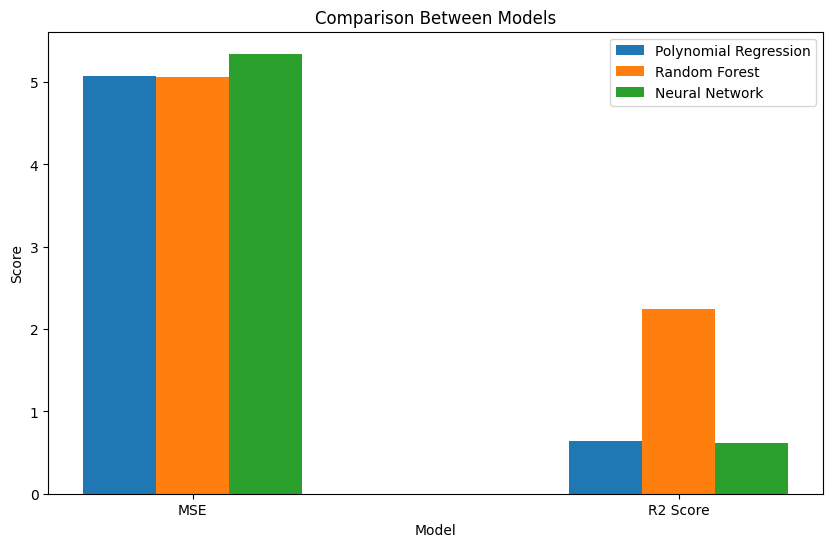

In [4]:
metrics = ['MSE', 'R2 Score']
polynomial_regression = [5.069439258236874, 0.6413573918421556]
neural_network = [5.061398983001709, 2.2497553162514605]
random_forest = [5.344748464734049, 0.6218803635480334]


bar_width = 0.15 
index = np.arange(len(metrics))

plt.figure(figsize=(10, 6))
plt.bar(index, polynomial_regression, width=bar_width, label='Polynomial Regression')
plt.bar(index + bar_width, neural_network, width=bar_width, label='Neural Network')
plt.bar(index + 2 * bar_width, random_forest, width=bar_width, label='Random Forest')

plt.xticks(index + bar_width, metrics)
plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Comparison Between Models')
plt.legend()
plt.show()